## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 55.7ms	remaining: 55.6s
1:	learn: 0.9301086	total: 62.6ms	remaining: 31.2s
2:	learn: 0.9005637	total: 65.5ms	remaining: 21.8s
3:	learn: 0.8720983	total: 68.7ms	remaining: 17.1s
4:	learn: 0.8467410	total: 71.7ms	remaining: 14.3s
5:	learn: 0.8226672	total: 74.8ms	remaining: 12.4s
6:	learn: 0.7994702	total: 77.9ms	remaining: 11.1s
7:	learn: 0.7784272	total: 80.8ms	remaining: 10s
8:	learn: 0.7602192	total: 83.6ms	remaining: 9.21s
9:	learn: 0.7412421	total: 95.4ms	remaining: 9.45s
10:	learn: 0.7247930	total: 98.7ms	remaining: 8.88s
11:	learn: 0.7089951	total: 102ms	remaining: 8.37s
12:	learn: 0.6951345	total: 104ms	remaining: 7.93s
13:	learn: 0.6809276	total: 108ms	remaining: 7.57s
14:	learn: 0.6692630	total: 111ms	remaining: 7.26s
15:	learn: 0.6588323	total: 113ms	remaining: 6.97s
16:	learn: 0.6472700	total: 125ms	remaining: 7.2s
17:	learn: 0.6379982	total: 132ms	remaining: 7.22s
18:	learn: 0.6294674	total: 136ms	remaining: 7s
19:	le

29:	learn: 0.5571384	total: 185ms	remaining: 5.97s
30:	learn: 0.5536829	total: 188ms	remaining: 5.87s
31:	learn: 0.5505614	total: 191ms	remaining: 5.77s
32:	learn: 0.5475131	total: 194ms	remaining: 5.69s
33:	learn: 0.5445860	total: 197ms	remaining: 5.6s
34:	learn: 0.5398906	total: 201ms	remaining: 5.53s
35:	learn: 0.5363592	total: 203ms	remaining: 5.45s
36:	learn: 0.5337228	total: 207ms	remaining: 5.38s
37:	learn: 0.5296892	total: 209ms	remaining: 5.3s
38:	learn: 0.5255485	total: 219ms	remaining: 5.39s
39:	learn: 0.5217941	total: 222ms	remaining: 5.33s
40:	learn: 0.5196440	total: 226ms	remaining: 5.29s
41:	learn: 0.5170220	total: 229ms	remaining: 5.23s
42:	learn: 0.5141148	total: 232ms	remaining: 5.17s
43:	learn: 0.5116444	total: 235ms	remaining: 5.11s
44:	learn: 0.5100547	total: 238ms	remaining: 5.05s
45:	learn: 0.5069096	total: 243ms	remaining: 5.05s
46:	learn: 0.5051685	total: 247ms	remaining: 5.01s
47:	learn: 0.5033968	total: 250ms	remaining: 4.96s
48:	learn: 0.5012433	total: 254ms

76:	learn: 0.4664479	total: 372ms	remaining: 4.45s
77:	learn: 0.4656044	total: 374ms	remaining: 4.42s
78:	learn: 0.4645375	total: 377ms	remaining: 4.4s
79:	learn: 0.4639654	total: 380ms	remaining: 4.37s
80:	learn: 0.4628457	total: 383ms	remaining: 4.34s
81:	learn: 0.4620203	total: 385ms	remaining: 4.31s
82:	learn: 0.4608838	total: 388ms	remaining: 4.29s
83:	learn: 0.4604376	total: 391ms	remaining: 4.26s
84:	learn: 0.4596603	total: 394ms	remaining: 4.24s
85:	learn: 0.4587835	total: 396ms	remaining: 4.21s
86:	learn: 0.4583577	total: 399ms	remaining: 4.18s
87:	learn: 0.4577999	total: 401ms	remaining: 4.16s
88:	learn: 0.4572657	total: 404ms	remaining: 4.13s
89:	learn: 0.4569360	total: 407ms	remaining: 4.11s
90:	learn: 0.4559969	total: 409ms	remaining: 4.09s
91:	learn: 0.4549716	total: 412ms	remaining: 4.07s
92:	learn: 0.4544919	total: 415ms	remaining: 4.05s
93:	learn: 0.4537693	total: 418ms	remaining: 4.03s
94:	learn: 0.4532673	total: 421ms	remaining: 4.01s
95:	learn: 0.4526987	total: 423m

119:	learn: 0.4383331	total: 563ms	remaining: 4.13s
120:	learn: 0.4378136	total: 565ms	remaining: 4.11s
121:	learn: 0.4375553	total: 582ms	remaining: 4.19s
122:	learn: 0.4369995	total: 585ms	remaining: 4.17s
123:	learn: 0.4366325	total: 592ms	remaining: 4.18s
124:	learn: 0.4362823	total: 599ms	remaining: 4.19s
125:	learn: 0.4359535	total: 603ms	remaining: 4.18s
126:	learn: 0.4353142	total: 608ms	remaining: 4.18s
127:	learn: 0.4349006	total: 612ms	remaining: 4.17s
128:	learn: 0.4345032	total: 615ms	remaining: 4.15s
129:	learn: 0.4342397	total: 620ms	remaining: 4.15s
130:	learn: 0.4336159	total: 628ms	remaining: 4.17s
131:	learn: 0.4332421	total: 631ms	remaining: 4.15s
132:	learn: 0.4327744	total: 634ms	remaining: 4.13s
133:	learn: 0.4323720	total: 636ms	remaining: 4.11s
134:	learn: 0.4319935	total: 639ms	remaining: 4.09s
135:	learn: 0.4313895	total: 642ms	remaining: 4.08s
136:	learn: 0.4307446	total: 645ms	remaining: 4.06s
137:	learn: 0.4304464	total: 648ms	remaining: 4.04s
138:	learn: 

175:	learn: 0.4140875	total: 751ms	remaining: 3.52s
176:	learn: 0.4136755	total: 754ms	remaining: 3.5s
177:	learn: 0.4133860	total: 757ms	remaining: 3.49s
178:	learn: 0.4129780	total: 759ms	remaining: 3.48s
179:	learn: 0.4122907	total: 762ms	remaining: 3.47s
180:	learn: 0.4119188	total: 765ms	remaining: 3.46s
181:	learn: 0.4115412	total: 768ms	remaining: 3.45s
182:	learn: 0.4112620	total: 770ms	remaining: 3.44s
183:	learn: 0.4107734	total: 773ms	remaining: 3.43s
184:	learn: 0.4104881	total: 776ms	remaining: 3.42s
185:	learn: 0.4100009	total: 778ms	remaining: 3.41s
186:	learn: 0.4096453	total: 781ms	remaining: 3.4s
187:	learn: 0.4093395	total: 784ms	remaining: 3.38s
188:	learn: 0.4090020	total: 789ms	remaining: 3.38s
189:	learn: 0.4085981	total: 791ms	remaining: 3.37s
190:	learn: 0.4082397	total: 794ms	remaining: 3.36s
191:	learn: 0.4079846	total: 797ms	remaining: 3.35s
192:	learn: 0.4076364	total: 800ms	remaining: 3.34s
193:	learn: 0.4069970	total: 802ms	remaining: 3.33s
194:	learn: 0.

237:	learn: 0.3939819	total: 943ms	remaining: 3.02s
238:	learn: 0.3938322	total: 946ms	remaining: 3.01s
239:	learn: 0.3935463	total: 948ms	remaining: 3s
240:	learn: 0.3933166	total: 952ms	remaining: 3s
241:	learn: 0.3930992	total: 955ms	remaining: 2.99s
242:	learn: 0.3928898	total: 958ms	remaining: 2.98s
243:	learn: 0.3926199	total: 961ms	remaining: 2.98s
244:	learn: 0.3923955	total: 964ms	remaining: 2.97s
245:	learn: 0.3922312	total: 967ms	remaining: 2.96s
246:	learn: 0.3919499	total: 969ms	remaining: 2.96s
247:	learn: 0.3917420	total: 972ms	remaining: 2.95s
248:	learn: 0.3915186	total: 976ms	remaining: 2.94s
249:	learn: 0.3912759	total: 978ms	remaining: 2.94s
250:	learn: 0.3908375	total: 981ms	remaining: 2.93s
251:	learn: 0.3904815	total: 984ms	remaining: 2.92s
252:	learn: 0.3902127	total: 987ms	remaining: 2.91s
253:	learn: 0.3900274	total: 990ms	remaining: 2.91s
254:	learn: 0.3898171	total: 993ms	remaining: 2.9s
255:	learn: 0.3896180	total: 995ms	remaining: 2.89s
256:	learn: 0.38942

302:	learn: 0.3789297	total: 1.13s	remaining: 2.6s
303:	learn: 0.3787482	total: 1.14s	remaining: 2.6s
304:	learn: 0.3786528	total: 1.14s	remaining: 2.59s
305:	learn: 0.3784406	total: 1.14s	remaining: 2.59s
306:	learn: 0.3782934	total: 1.14s	remaining: 2.58s
307:	learn: 0.3781631	total: 1.15s	remaining: 2.58s
308:	learn: 0.3779278	total: 1.15s	remaining: 2.57s
309:	learn: 0.3777358	total: 1.15s	remaining: 2.56s
310:	learn: 0.3775809	total: 1.15s	remaining: 2.56s
311:	learn: 0.3774323	total: 1.16s	remaining: 2.55s
312:	learn: 0.3772732	total: 1.16s	remaining: 2.55s
313:	learn: 0.3771184	total: 1.16s	remaining: 2.54s
314:	learn: 0.3769370	total: 1.17s	remaining: 2.53s
315:	learn: 0.3766643	total: 1.17s	remaining: 2.53s
316:	learn: 0.3764891	total: 1.17s	remaining: 2.52s
317:	learn: 0.3762751	total: 1.17s	remaining: 2.52s
318:	learn: 0.3761284	total: 1.18s	remaining: 2.51s
319:	learn: 0.3760168	total: 1.18s	remaining: 2.5s
320:	learn: 0.3757763	total: 1.18s	remaining: 2.5s
321:	learn: 0.37

364:	learn: 0.3679761	total: 1.32s	remaining: 2.3s
365:	learn: 0.3677932	total: 1.32s	remaining: 2.29s
366:	learn: 0.3676022	total: 1.33s	remaining: 2.29s
367:	learn: 0.3674148	total: 1.33s	remaining: 2.29s
368:	learn: 0.3673439	total: 1.34s	remaining: 2.29s
369:	learn: 0.3671985	total: 1.34s	remaining: 2.28s
370:	learn: 0.3670563	total: 1.34s	remaining: 2.28s
371:	learn: 0.3669128	total: 1.35s	remaining: 2.28s
372:	learn: 0.3668381	total: 1.35s	remaining: 2.27s
373:	learn: 0.3666564	total: 1.36s	remaining: 2.27s
374:	learn: 0.3663789	total: 1.36s	remaining: 2.27s
375:	learn: 0.3661576	total: 1.36s	remaining: 2.27s
376:	learn: 0.3659742	total: 1.37s	remaining: 2.27s
377:	learn: 0.3658330	total: 1.37s	remaining: 2.26s
378:	learn: 0.3656680	total: 1.38s	remaining: 2.25s
379:	learn: 0.3654606	total: 1.38s	remaining: 2.25s
380:	learn: 0.3651842	total: 1.38s	remaining: 2.25s
381:	learn: 0.3650538	total: 1.38s	remaining: 2.24s
382:	learn: 0.3649246	total: 1.39s	remaining: 2.23s
383:	learn: 0

427:	learn: 0.3579182	total: 1.51s	remaining: 2.02s
428:	learn: 0.3577521	total: 1.51s	remaining: 2.01s
429:	learn: 0.3576138	total: 1.52s	remaining: 2.01s
430:	learn: 0.3575528	total: 1.52s	remaining: 2s
431:	learn: 0.3574686	total: 1.52s	remaining: 2s
432:	learn: 0.3572923	total: 1.52s	remaining: 2s
433:	learn: 0.3571859	total: 1.53s	remaining: 1.99s
434:	learn: 0.3570185	total: 1.53s	remaining: 1.99s
435:	learn: 0.3568416	total: 1.53s	remaining: 1.98s
436:	learn: 0.3566846	total: 1.53s	remaining: 1.98s
437:	learn: 0.3565875	total: 1.54s	remaining: 1.97s
438:	learn: 0.3564768	total: 1.55s	remaining: 1.98s
439:	learn: 0.3563559	total: 1.55s	remaining: 1.97s
440:	learn: 0.3561557	total: 1.55s	remaining: 1.97s
441:	learn: 0.3559793	total: 1.55s	remaining: 1.96s
442:	learn: 0.3558695	total: 1.56s	remaining: 1.96s
443:	learn: 0.3557039	total: 1.56s	remaining: 1.95s
444:	learn: 0.3555934	total: 1.56s	remaining: 1.95s
445:	learn: 0.3553700	total: 1.56s	remaining: 1.94s
446:	learn: 0.3553048

495:	learn: 0.3484072	total: 1.7s	remaining: 1.73s
496:	learn: 0.3482698	total: 1.7s	remaining: 1.72s
497:	learn: 0.3481630	total: 1.71s	remaining: 1.72s
498:	learn: 0.3480855	total: 1.71s	remaining: 1.72s
499:	learn: 0.3478655	total: 1.71s	remaining: 1.71s
500:	learn: 0.3477966	total: 1.72s	remaining: 1.71s
501:	learn: 0.3476142	total: 1.72s	remaining: 1.7s
502:	learn: 0.3474667	total: 1.72s	remaining: 1.7s
503:	learn: 0.3473844	total: 1.72s	remaining: 1.7s
504:	learn: 0.3471852	total: 1.73s	remaining: 1.69s
505:	learn: 0.3471124	total: 1.73s	remaining: 1.69s
506:	learn: 0.3469987	total: 1.73s	remaining: 1.68s
507:	learn: 0.3469000	total: 1.73s	remaining: 1.68s
508:	learn: 0.3467621	total: 1.74s	remaining: 1.68s
509:	learn: 0.3466653	total: 1.74s	remaining: 1.67s
510:	learn: 0.3465795	total: 1.74s	remaining: 1.67s
511:	learn: 0.3464899	total: 1.74s	remaining: 1.66s
512:	learn: 0.3463711	total: 1.75s	remaining: 1.66s
513:	learn: 0.3462483	total: 1.75s	remaining: 1.65s
514:	learn: 0.346

563:	learn: 0.3400466	total: 1.89s	remaining: 1.46s
564:	learn: 0.3399235	total: 1.89s	remaining: 1.46s
565:	learn: 0.3398064	total: 1.9s	remaining: 1.45s
566:	learn: 0.3396466	total: 1.9s	remaining: 1.45s
567:	learn: 0.3395531	total: 1.9s	remaining: 1.45s
568:	learn: 0.3394093	total: 1.9s	remaining: 1.44s
569:	learn: 0.3393241	total: 1.91s	remaining: 1.44s
570:	learn: 0.3392368	total: 1.91s	remaining: 1.44s
571:	learn: 0.3391373	total: 1.91s	remaining: 1.43s
572:	learn: 0.3390261	total: 1.92s	remaining: 1.43s
573:	learn: 0.3389126	total: 1.92s	remaining: 1.43s
574:	learn: 0.3388268	total: 1.92s	remaining: 1.42s
575:	learn: 0.3387474	total: 1.93s	remaining: 1.42s
576:	learn: 0.3386361	total: 1.93s	remaining: 1.41s
577:	learn: 0.3385706	total: 1.93s	remaining: 1.41s
578:	learn: 0.3384814	total: 1.94s	remaining: 1.41s
579:	learn: 0.3383559	total: 1.94s	remaining: 1.4s
580:	learn: 0.3382469	total: 1.94s	remaining: 1.4s
581:	learn: 0.3381645	total: 1.94s	remaining: 1.4s
582:	learn: 0.33805

632:	learn: 0.3330288	total: 2.08s	remaining: 1.21s
633:	learn: 0.3328844	total: 2.08s	remaining: 1.2s
634:	learn: 0.3328544	total: 2.09s	remaining: 1.2s
635:	learn: 0.3327021	total: 2.09s	remaining: 1.2s
636:	learn: 0.3326462	total: 2.09s	remaining: 1.19s
637:	learn: 0.3325758	total: 2.1s	remaining: 1.19s
638:	learn: 0.3324324	total: 2.1s	remaining: 1.19s
639:	learn: 0.3323174	total: 2.1s	remaining: 1.18s
640:	learn: 0.3322206	total: 2.1s	remaining: 1.18s
641:	learn: 0.3321031	total: 2.11s	remaining: 1.17s
642:	learn: 0.3319978	total: 2.11s	remaining: 1.17s
643:	learn: 0.3319044	total: 2.11s	remaining: 1.17s
644:	learn: 0.3318169	total: 2.12s	remaining: 1.17s
645:	learn: 0.3316585	total: 2.13s	remaining: 1.16s
646:	learn: 0.3316256	total: 2.13s	remaining: 1.16s
647:	learn: 0.3315220	total: 2.13s	remaining: 1.16s
648:	learn: 0.3313829	total: 2.13s	remaining: 1.15s
649:	learn: 0.3313125	total: 2.14s	remaining: 1.15s
650:	learn: 0.3311735	total: 2.14s	remaining: 1.15s
651:	learn: 0.33103

697:	learn: 0.3266887	total: 2.27s	remaining: 984ms
698:	learn: 0.3265888	total: 2.28s	remaining: 981ms
699:	learn: 0.3265229	total: 2.28s	remaining: 977ms
700:	learn: 0.3264350	total: 2.28s	remaining: 974ms
701:	learn: 0.3263223	total: 2.29s	remaining: 971ms
702:	learn: 0.3262539	total: 2.29s	remaining: 967ms
703:	learn: 0.3261258	total: 2.29s	remaining: 964ms
704:	learn: 0.3260520	total: 2.3s	remaining: 961ms
705:	learn: 0.3259475	total: 2.3s	remaining: 958ms
706:	learn: 0.3258911	total: 2.3s	remaining: 954ms
707:	learn: 0.3257903	total: 2.31s	remaining: 951ms
708:	learn: 0.3256952	total: 2.31s	remaining: 948ms
709:	learn: 0.3255982	total: 2.31s	remaining: 945ms
710:	learn: 0.3255301	total: 2.32s	remaining: 941ms
711:	learn: 0.3254442	total: 2.32s	remaining: 938ms
712:	learn: 0.3253361	total: 2.32s	remaining: 935ms
713:	learn: 0.3252431	total: 2.33s	remaining: 931ms
714:	learn: 0.3251186	total: 2.33s	remaining: 928ms
715:	learn: 0.3250323	total: 2.33s	remaining: 925ms
716:	learn: 0.3

758:	learn: 0.3214274	total: 2.47s	remaining: 784ms
759:	learn: 0.3212014	total: 2.47s	remaining: 781ms
760:	learn: 0.3211190	total: 2.47s	remaining: 777ms
761:	learn: 0.3210312	total: 2.48s	remaining: 774ms
762:	learn: 0.3209495	total: 2.48s	remaining: 770ms
763:	learn: 0.3208564	total: 2.48s	remaining: 767ms
764:	learn: 0.3207911	total: 2.48s	remaining: 763ms
765:	learn: 0.3206643	total: 2.49s	remaining: 760ms
766:	learn: 0.3205891	total: 2.49s	remaining: 757ms
767:	learn: 0.3204765	total: 2.49s	remaining: 753ms
768:	learn: 0.3203840	total: 2.5s	remaining: 750ms
769:	learn: 0.3203086	total: 2.5s	remaining: 746ms
770:	learn: 0.3202066	total: 2.5s	remaining: 743ms
771:	learn: 0.3200935	total: 2.5s	remaining: 739ms
772:	learn: 0.3200251	total: 2.51s	remaining: 736ms
773:	learn: 0.3199577	total: 2.51s	remaining: 733ms
774:	learn: 0.3198837	total: 2.51s	remaining: 729ms
775:	learn: 0.3198135	total: 2.51s	remaining: 726ms
776:	learn: 0.3197430	total: 2.52s	remaining: 722ms
777:	learn: 0.31

827:	learn: 0.3154546	total: 2.65s	remaining: 552ms
828:	learn: 0.3153664	total: 2.66s	remaining: 548ms
829:	learn: 0.3152896	total: 2.66s	remaining: 545ms
830:	learn: 0.3152050	total: 2.66s	remaining: 542ms
831:	learn: 0.3151385	total: 2.67s	remaining: 538ms
832:	learn: 0.3150922	total: 2.67s	remaining: 535ms
833:	learn: 0.3149588	total: 2.67s	remaining: 532ms
834:	learn: 0.3149074	total: 2.67s	remaining: 529ms
835:	learn: 0.3148291	total: 2.68s	remaining: 525ms
836:	learn: 0.3147707	total: 2.68s	remaining: 522ms
837:	learn: 0.3147022	total: 2.68s	remaining: 519ms
838:	learn: 0.3145737	total: 2.69s	remaining: 515ms
839:	learn: 0.3144908	total: 2.69s	remaining: 512ms
840:	learn: 0.3144038	total: 2.69s	remaining: 509ms
841:	learn: 0.3143434	total: 2.69s	remaining: 505ms
842:	learn: 0.3142662	total: 2.7s	remaining: 502ms
843:	learn: 0.3141532	total: 2.7s	remaining: 499ms
844:	learn: 0.3140919	total: 2.7s	remaining: 496ms
845:	learn: 0.3140384	total: 2.7s	remaining: 492ms
846:	learn: 0.31

897:	learn: 0.3101565	total: 2.85s	remaining: 323ms
898:	learn: 0.3100955	total: 2.85s	remaining: 320ms
899:	learn: 0.3100512	total: 2.85s	remaining: 317ms
900:	learn: 0.3100138	total: 2.85s	remaining: 314ms
901:	learn: 0.3099635	total: 2.86s	remaining: 311ms
902:	learn: 0.3098989	total: 2.86s	remaining: 307ms
903:	learn: 0.3098084	total: 2.87s	remaining: 304ms
904:	learn: 0.3097402	total: 2.87s	remaining: 301ms
905:	learn: 0.3096378	total: 2.87s	remaining: 298ms
906:	learn: 0.3095878	total: 2.87s	remaining: 295ms
907:	learn: 0.3095154	total: 2.88s	remaining: 291ms
908:	learn: 0.3094688	total: 2.88s	remaining: 288ms
909:	learn: 0.3093784	total: 2.88s	remaining: 285ms
910:	learn: 0.3093058	total: 2.88s	remaining: 282ms
911:	learn: 0.3092574	total: 2.89s	remaining: 279ms
912:	learn: 0.3092023	total: 2.89s	remaining: 276ms
913:	learn: 0.3091306	total: 2.89s	remaining: 272ms
914:	learn: 0.3090719	total: 2.9s	remaining: 269ms
915:	learn: 0.3090199	total: 2.9s	remaining: 266ms
916:	learn: 0.

959:	learn: 0.3056692	total: 3.04s	remaining: 127ms
960:	learn: 0.3055777	total: 3.04s	remaining: 123ms
961:	learn: 0.3054462	total: 3.04s	remaining: 120ms
962:	learn: 0.3053516	total: 3.04s	remaining: 117ms
963:	learn: 0.3052664	total: 3.05s	remaining: 114ms
964:	learn: 0.3052264	total: 3.05s	remaining: 111ms
965:	learn: 0.3051873	total: 3.05s	remaining: 107ms
966:	learn: 0.3051018	total: 3.06s	remaining: 104ms
967:	learn: 0.3050172	total: 3.06s	remaining: 101ms
968:	learn: 0.3049470	total: 3.06s	remaining: 98ms
969:	learn: 0.3049028	total: 3.06s	remaining: 94.8ms
970:	learn: 0.3048446	total: 3.07s	remaining: 91.6ms
971:	learn: 0.3047712	total: 3.07s	remaining: 88.5ms
972:	learn: 0.3047313	total: 3.07s	remaining: 85.3ms
973:	learn: 0.3046600	total: 3.08s	remaining: 82.1ms
974:	learn: 0.3045983	total: 3.08s	remaining: 79ms
975:	learn: 0.3044944	total: 3.08s	remaining: 75.8ms
976:	learn: 0.3044431	total: 3.08s	remaining: 72.6ms
977:	learn: 0.3043959	total: 3.09s	remaining: 69.5ms
978:	l

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5705248536952006


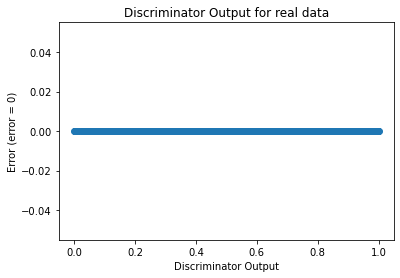

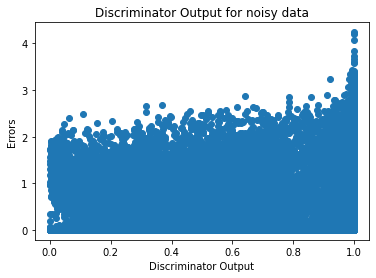

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5022]], device='cuda:0', requires_grad=True)
